<a href="https://colab.research.google.com/github/msrana172/Machine-Learning-ML-/blob/master/Knight_ML_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

In [0]:
train_data = '/content/drive/My Drive/Knight ML Assignment/Data/train.csv'
test_data = '/content/drive/My Drive/Knight ML Assignment/Data/test.csv'
data = pd.read_csv(train_data)
test_data = pd.read_csv(test_data)

In [75]:
data.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,NaN,Australia,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Peace Family Vineyard,83,10.0,Australia Other,South Eastern Australia,NaN,Andrew Peace,Chardonnay
1,@wawinereport,US,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,NaN,89,15.0,Washington,Columbia Valley (WA),Columbia Valley,North by Northwest,Red Blend
2,NaN,Italy,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,Conca,94,80.0,Piedmont,Barolo,NaN,Renato Ratti,Nebbiolo
3,@vossroger,France,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,L'Abbaye,87,22.0,Southwest France,Bergerac Sec,NaN,Domaine l'Ancienne Cure,Bordeaux-style White Blend
4,@vossroger,France,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",Le Cèdre Vintage,88,33.0,France Other,Vin de Liqueur,NaN,Château du Cèdre,Malbec


In [76]:
test_data.head(2)

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery
0,@paulgwine,US,Boedecker Cellars 2011 Athena Pinot Noir (Will...,Nicely differentiated from the companion Stewa...,Athena,88,35.0,Oregon,Willamette Valley,Willamette Valley,Boedecker Cellars
1,@wineschach,Argentina,Mendoza Vineyards 2012 Gran Reserva by Richard...,"Charred, smoky, herbal aromas of blackberry tr...",Gran Reserva by Richard Bonvin,90,60.0,Mendoza Province,Mendoza,NaN,Mendoza Vineyards


In [77]:
data.columns

Index(['user_name', 'country', 'review_title', 'review_description',
       'designation', 'points', 'price', 'province', 'region_1', 'region_2',
       'winery', 'variety'],
      dtype='object')

In [78]:
test_data.columns

Index(['user_name', 'country', 'review_title', 'review_description',
       'designation', 'points', 'price', 'province', 'region_1', 'region_2',
       'winery'],
      dtype='object')

In [79]:
print('Size of Training Data :->',data.shape) 
print('Size of Testing Data  :->', test_data.shape)

Size of Training Data :-> (82657, 12)
Size of Testing Data  :-> (20665, 11)


In [80]:
data.describe()

,points,price
count,82657.000000,77088.000000
mean,88.544564,36.922232
std,3.099649,43.698346
min,80.000000,4.000000
25%,86.000000,18.000000
50%,88.000000,27.000000
75%,91.000000,45.000000
max,100.000000,3300.000000


In [0]:
df = data.copy() 

In [0]:
df = data[['review_title','review_description']]

In [83]:
df

,review_title,review_description
0,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h..."
1,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...
2,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...
3,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...
4,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie..."
...,...,...
82652,Montecillo 2007 Crianza (Rioja),"Hot earth, baked cherry and mild vanilla aroma..."
82653,Vivác Winery 2008 Single Vineyard Cabernet Sau...,"Pungent, high-pitched notes of turmeric and dr..."
82654,Domaine de la Madone 2014 Nouveau (Beaujolais...,This is a wine that's not just lively and frui...
82655,Château Beaumont 2011 Haut-Médoc,"An impressive wine, it already shows signs of ..."


In [0]:
data = data.loc[:,['review_title', 'review_description', 'designation', 'country', 'points', 'price', 'winery', 'variety']]

In [85]:
data.head(3)

,review_title,review_description,designation,country,points,price,winery,variety
0,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Peace Family Vineyard,Australia,83,10.0,Andrew Peace,Chardonnay
1,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,NaN,US,89,15.0,North by Northwest,Red Blend
2,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,Conca,Italy,94,80.0,Renato Ratti,Nebbiolo


In [86]:
data.shape

(82657, 8)

In [87]:
review_title_null = data.loc[data['review_title'].isnull()]
review_description_null = data.loc[data['review_description'].isnull()]
desig_null = data.loc[data['designation'].isnull()]
country_null = data.loc[data['country'].isnull()]
points_null = data.loc[data['points'].isnull()]
price_null = data.loc[data['price'].isnull()]
winery_null = data.loc[data['winery'].isnull()]
variety_null = data.loc[data['variety'].isnull()]

print(review_title_null.shape[0]/82657 *100, '% of data points where review_title is null')
print(review_description_null.shape[0]/82657 *100,'% of data points where review_description is null')
print(desig_null.shape[0]/82657 *100,'% of data points where designation is null')
print(country_null.shape[0]/82657 *100,'% of data points where country is null')
print(points_null.shape[0]/82657 *100, '% of data points where points is null')
print(price_null.shape[0]/82657 *100, '% of data points where price is null')
print(winery_null.shape[0]/82657 *100,'% of data points where winery is null')
print(variety_null.shape[0]/82657 *100,'% of data points where variety is null')

0.0 % of data points where review_title is null
0.0 % of data points where review_description is null
28.608587294482017 % of data points where designation is null
0.04234366115392526 % of data points where country is null
0.0 % of data points where points is null
6.737481399034564 % of data points where price is null
0.0 % of data points where winery is null
0.0 % of data points where variety is null


In [88]:
data.isnull().sum(axis = 0)

review_title              0
review_description        0
designation           23647
country                  35
points                    0
price                  5569
winery                    0
variety                   0
dtype: int64

In [89]:
data =data.loc[~data['designation'].isnull()]
print('Number of data points After eliminating designation = NULL :', data.shape[0])

Number of data points After eliminating designation = NULL : 59010


In [90]:
data = data.loc[~data['country'].isnull()]
print('Number of data points After eliminating country=NULL :', data.shape[0])

Number of data points After eliminating country=NULL : 58980


In [91]:
data = data.loc[~data['price'].isnull()]
print('Number of data points After eliminating price = NULL :', data.shape[0])

Number of data points After eliminating price = NULL : 55128


In [92]:
print(55128/82657 *100 ,"% of data remained after eliminating null values")

66.69489577410262 % of data remained after eliminating null values


In [93]:
data.isnull().sum(axis = 0)

review_title          0
review_description    0
designation           0
country               0
points                0
price                 0
winery                0
variety               0
dtype: int64

In [94]:
data.head()

,review_title,review_description,designation,country,points,price,winery,variety
0,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Peace Family Vineyard,Australia,83,10.0,Andrew Peace,Chardonnay
2,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,Conca,Italy,94,80.0,Renato Ratti,Nebbiolo
3,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,L'Abbaye,France,87,22.0,Domaine l'Ancienne Cure,Bordeaux-style White Blend
4,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",Le Cèdre Vintage,France,88,33.0,Château du Cèdre,Malbec
5,Andean 2005 Finca La Escondida Reserva Caberne...,"Strident aromas of licorice, herbs, berries an...",Finca La Escondida Reserva,Argentina,85,13.0,Andean,Cabernet Sauvignon


In [95]:
dup_description = sum(data.duplicated('review_description'))
dup_title =  sum(data.duplicated('review_title'))
print(dup_description)
print(dup_title)

3374
3819


In [96]:
data.shape

(55128, 8)

In [0]:
dup_title = data.duplicated('review_description')
dup_title = pd.DataFrame(dup_title)
dup_title.columns = ['bool']    
dup_title.head()
indx = dup_title.loc[dup_title['bool'] == True]
for i in indx.iterrows():
    data = data.drop(i[0])

In [0]:
dup_title = data.duplicated('review_title')
dup_title = pd.DataFrame(dup_title)
dup_title.columns = ['bool']    
dup_title.head()
indx = dup_title.loc[dup_title['bool'] == True]
for i in indx.iterrows():
    data = data.drop(i[0])

In [99]:
data.shape

(51303, 8)

In [0]:
import pickle

In [0]:
# with open('/content/drive/My Drive/Knight ML Assignment/pickels/cleaned_data.pkl', 'wb') as f:
#     pickle.dump(data, f) 

In [0]:
# data.to_pickle('/content/drive/My Drive/Knight ML Assignment/pickels/cleaned_data1.pkl')

In [0]:
data = pd.read_pickle('/content/drive/My Drive/Knight ML Assignment/pickels/cleaned_data.pkl')

In [17]:
data

,review_title,review_description,designation,country,points,price,winery,variety
0,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Peace Family Vineyard,Australia,83,10.0,Andrew Peace,Chardonnay
2,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,Conca,Italy,94,80.0,Renato Ratti,Nebbiolo
3,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,L'Abbaye,France,87,22.0,Domaine l'Ancienne Cure,Bordeaux-style White Blend
4,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",Le Cèdre Vintage,France,88,33.0,Château du Cèdre,Malbec
5,Andean 2005 Finca La Escondida Reserva Caberne...,"Strident aromas of licorice, herbs, berries an...",Finca La Escondida Reserva,Argentina,85,13.0,Andean,Cabernet Sauvignon
...,...,...,...,...,...,...,...,...
82644,Guillaume Gros 2007 Pourquois Pas Red (Côtes d...,This may lack the silky completeness of Gros's...,Pourquois Pas,France,87,25.0,Guillaume Gros,Rhône-style Red Blend
82652,Montecillo 2007 Crianza (Rioja),"Hot earth, baked cherry and mild vanilla aroma...",Crianza,Spain,84,12.0,Montecillo,Tempranillo
82653,Vivác Winery 2008 Single Vineyard Cabernet Sau...,"Pungent, high-pitched notes of turmeric and dr...",Single Vineyard,US,85,21.0,Vivác Winery,Cabernet Sauvignon
82654,Domaine de la Madone 2014 Nouveau (Beaujolais...,This is a wine that's not just lively and frui...,Nouveau,France,87,14.0,Domaine de la Madone,Gamay


In [0]:
# data.reset_index(inplace = True)
data.reset_index(inplace = True,drop = True)

In [21]:
data

,review_title,review_description,designation,country,points,price,winery,variety
0,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Peace Family Vineyard,Australia,83,10.0,Andrew Peace,Chardonnay
1,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,Conca,Italy,94,80.0,Renato Ratti,Nebbiolo
2,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,L'Abbaye,France,87,22.0,Domaine l'Ancienne Cure,Bordeaux-style White Blend
3,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",Le Cèdre Vintage,France,88,33.0,Château du Cèdre,Malbec
4,Andean 2005 Finca La Escondida Reserva Caberne...,"Strident aromas of licorice, herbs, berries an...",Finca La Escondida Reserva,Argentina,85,13.0,Andean,Cabernet Sauvignon
...,...,...,...,...,...,...,...,...
51298,Guillaume Gros 2007 Pourquois Pas Red (Côtes d...,This may lack the silky completeness of Gros's...,Pourquois Pas,France,87,25.0,Guillaume Gros,Rhône-style Red Blend
51299,Montecillo 2007 Crianza (Rioja),"Hot earth, baked cherry and mild vanilla aroma...",Crianza,Spain,84,12.0,Montecillo,Tempranillo
51300,Vivác Winery 2008 Single Vineyard Cabernet Sau...,"Pungent, high-pitched notes of turmeric and dr...",Single Vineyard,US,85,21.0,Vivác Winery,Cabernet Sauvignon
51301,Domaine de la Madone 2014 Nouveau (Beaujolais...,This is a wine that's not just lively and frui...,Nouveau,France,87,14.0,Domaine de la Madone,Gamay


In [0]:
# del data['index']

In [22]:
data

,review_title,review_description,designation,country,points,price,winery,variety
0,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Peace Family Vineyard,Australia,83,10.0,Andrew Peace,Chardonnay
1,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,Conca,Italy,94,80.0,Renato Ratti,Nebbiolo
2,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,L'Abbaye,France,87,22.0,Domaine l'Ancienne Cure,Bordeaux-style White Blend
3,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",Le Cèdre Vintage,France,88,33.0,Château du Cèdre,Malbec
4,Andean 2005 Finca La Escondida Reserva Caberne...,"Strident aromas of licorice, herbs, berries an...",Finca La Escondida Reserva,Argentina,85,13.0,Andean,Cabernet Sauvignon
...,...,...,...,...,...,...,...,...
51298,Guillaume Gros 2007 Pourquois Pas Red (Côtes d...,This may lack the silky completeness of Gros's...,Pourquois Pas,France,87,25.0,Guillaume Gros,Rhône-style Red Blend
51299,Montecillo 2007 Crianza (Rioja),"Hot earth, baked cherry and mild vanilla aroma...",Crianza,Spain,84,12.0,Montecillo,Tempranillo
51300,Vivác Winery 2008 Single Vineyard Cabernet Sau...,"Pungent, high-pitched notes of turmeric and dr...",Single Vineyard,US,85,21.0,Vivác Winery,Cabernet Sauvignon
51301,Domaine de la Madone 2014 Nouveau (Beaujolais...,This is a wine that's not just lively and frui...,Nouveau,France,87,14.0,Domaine de la Madone,Gamay


In [23]:
data['review_description'].head()

0    Classic Chardonnay aromas of apple, pear and h...
1    Barolo Conca opens with inky dark concentratio...
2    It's impressive what a small addition of Sauvi...
3    This ripe, sweet wine is rich and full of drie...
4    Strident aromas of licorice, herbs, berries an...
Name: review_description, dtype: object

In [24]:
var_ = data['variety'].value_counts()
var_

Pinot Noir                    7165
Chardonnay                    5504
Red Blend                     5328
Cabernet Sauvignon            4333
Riesling                      3137
Syrah                         2265
Bordeaux-style Red Blend      2175
Sauvignon Blanc               2054
Rosé                          1677
Zinfandel                     1571
Portuguese Red                1528
Malbec                        1471
White Blend                   1433
Nebbiolo                      1398
Sparkling Blend               1318
Merlot                        1196
Tempranillo                   1085
Sangiovese                    1010
Rhône-style Red Blend          872
Champagne Blend                792
Grüner Veltliner               731
Portuguese White               666
Cabernet Franc                 607
Pinot Gris                     561
Gewürztraminer                 512
Gamay                          444
Pinot Grigio                   284
Bordeaux-style White Blend     186
Name: variety, dtype

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


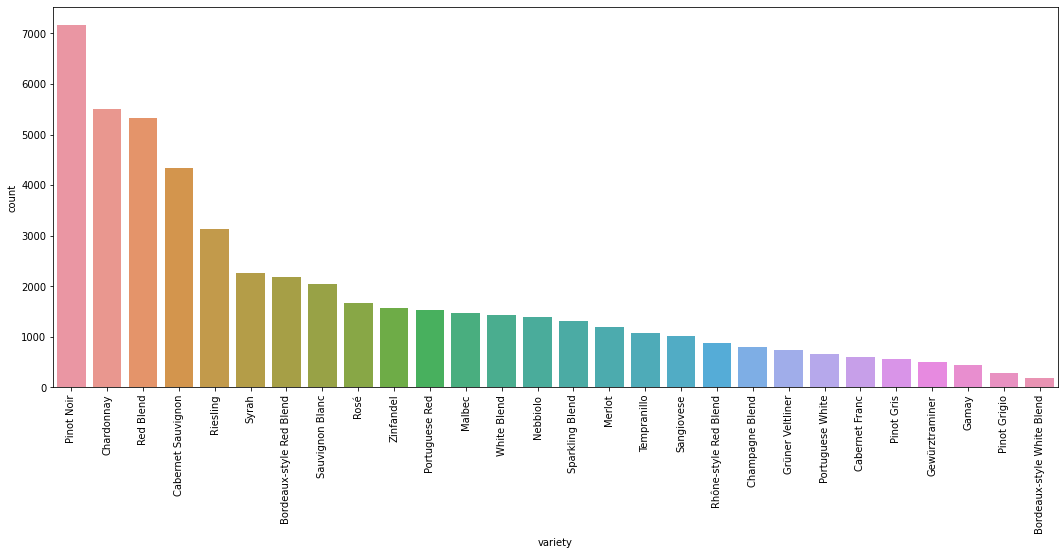

In [32]:
data = data.groupby('variety').filter(lambda x: len(x) >100)
list = data.variety.value_counts().index.tolist()
fig4, ax4 = plt.subplots(figsize = (18, 7))
sns.countplot(x = 'variety', data = data, order = list, ax = ax4)
plt.xticks(rotation = 90)
plt.show()

In [33]:
g=data.groupby('variety')
data = g.filter(lambda x: len(x) > 100)
data['variety'].describe()

count          51303
unique            28
top       Pinot Noir
freq            7165
Name: variety, dtype: object

In [34]:
target = pd.DataFrame(data['variety'])
target.columns = ['variety']
data = data.drop('variety', axis = 1)
print(target.head())
print(data.columns)

                      variety
0                  Chardonnay
1                    Nebbiolo
2  Bordeaux-style White Blend
3                      Malbec
4          Cabernet Sauvignon
Index(['review_title', 'review_description', 'designation', 'country',
       'points', 'price', 'winery'],
      dtype='object')


In [35]:
target.shape

(51303, 1)

In [38]:
data.shape

(51303, 7)

In [0]:
target.to_pickle('/content/drive/My Drive/Knight ML Assignment/pickels/target')

In [0]:
target = pd.read_pickle('/content/drive/My Drive/Knight ML Assignment/pickels/target')

In [0]:
from collections import Counter

In [66]:
Counter(target['variety'])

Counter({'Bordeaux-style Red Blend': 2175,
         'Bordeaux-style White Blend': 186,
         'Cabernet Franc': 607,
         'Cabernet Sauvignon': 4333,
         'Champagne Blend': 792,
         'Chardonnay': 5504,
         'Gamay': 444,
         'Gewürztraminer': 512,
         'Grüner Veltliner': 731,
         'Malbec': 1471,
         'Merlot': 1196,
         'Nebbiolo': 1398,
         'Pinot Grigio': 284,
         'Pinot Gris': 561,
         'Pinot Noir': 7165,
         'Portuguese Red': 1528,
         'Portuguese White': 666,
         'Red Blend': 5328,
         'Rhône-style Red Blend': 872,
         'Riesling': 3137,
         'Rosé': 1677,
         'Sangiovese': 1010,
         'Sauvignon Blanc': 2054,
         'Sparkling Blend': 1318,
         'Syrah': 2265,
         'Tempranillo': 1085,
         'White Blend': 1433,
         'Zinfandel': 1571})

In [0]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.linear_model import  SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [55]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [56]:
stop_words = set(stopwords.words('english'))
print ('list of stop words:', stop_words)

def nlp_preprocessing(total_text, index, column):
    if type(total_text) is not int:
        string = ""
        for words in total_text.split():
            # remove the special chars in review like '"#$@!%^&*()_+-~?>< etc.
            word = ("".join(e for e in words if e.isalnum()))
            # Conver all letters to lower-case
            word = word.lower()
            # stop-word removal
            if not word in stop_words:
                string += word + " "
        data[column][index] = string

list of stop words: {'again', 'we', 'herself', 'don', 'haven', 'some', 'such', 'this', "needn't", "won't", 'once', 'all', "you'd", 'any', 'aren', 'from', 'how', 'as', 'needn', "it's", "you're", 'down', "don't", 'it', "wouldn't", 'in', 'shan', 'can', 'who', 'my', 'these', 're', "didn't", 'he', 'up', 'be', 'both', 'into', 'didn', 'about', 'having', 'is', 'him', 'ours', 'which', "isn't", 'very', "shan't", 'through', 'only', 'should', 'each', 'a', 'myself', 'i', 'of', 'ain', 'further', 'an', 'while', 'then', 'its', 'did', 'because', 'why', 'she', 'themselves', 'mightn', "shouldn't", 'here', 'just', 'am', 'y', "wasn't", 'hasn', 'yourselves', 'but', 'wasn', 'yourself', 'few', 'weren', 'the', 'mustn', "that'll", 'do', 'too', 'has', 'whom', 'after', 'there', "hadn't", 'himself', 'on', 'was', "mustn't", 'have', 've', 'had', 'his', 'with', 'o', 'against', "aren't", 'at', 'below', 'were', 'wouldn', 'between', 'most', 'd', 'by', 'nor', "you'll", 'where', 'couldn', 'shouldn', 'm', 'other', 'under',

In [67]:
target['variety'] = target['variety'].astype('category')
cat_columns = target.select_dtypes(['category']).columns
target[cat_columns] = target[cat_columns].apply(lambda x: x.cat.codes)
Counter(target['variety'])

Counter({0: 2175,
         1: 186,
         2: 607,
         3: 4333,
         4: 792,
         5: 5504,
         6: 444,
         7: 512,
         8: 731,
         9: 1471,
         10: 1196,
         11: 1398,
         12: 284,
         13: 561,
         14: 7165,
         15: 1528,
         16: 666,
         17: 5328,
         18: 872,
         19: 3137,
         20: 1677,
         21: 1010,
         22: 2054,
         23: 1318,
         24: 2265,
         25: 1085,
         26: 1433,
         27: 1571})

In [0]:
X_train, test_df, y_train, y_test = train_test_split(data, target, stratify = target, test_size=0.2)
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
train_df, cv_df, y_train, y_cv = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2)

In [72]:
print(train_df.shape)
print(cv_df.shape)
print(test_df.shape)

(32833, 7)
(8209, 7)
(10261, 7)


In [0]:
desc_vectorizer = CountVectorizer()
train_description_feature_onehotCoding = desc_vectorizer.fit_transform(train_df['review_description'])
test_description_feature_onehotCoding = desc_vectorizer.transform(test_df['review_description'])
cv_description_feature_onehotCoding = desc_vectorizer.transform(cv_df['review_description'])

In [75]:
train_description_feature_onehotCoding.shape

(32833, 19133)

In [0]:
import numpy as np

for alpha = 1e-05


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy : 0.5503715434279449
for alpha = 0.0001


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy : 0.5641369228895116
for alpha = 0.001


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy : 0.58009501766354
for alpha = 0.1


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy : 0.610183944451212
for alpha = 1


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy : 0.5621878426117676
for alpha = 10


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy : 0.36801071994152756
for alpha = 100


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy : 0.29492020952612985
for alpha = 1000


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy : 0.2679985381897917


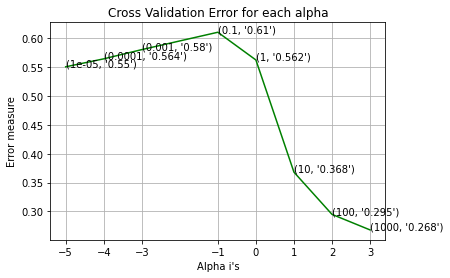

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For values of best alpha =  0.1 The train accuracy is: 0.7769317454999544
For values of best alpha =  0.1 The cross validation accuracy is: 0.610183944451212
For values of best alpha =  0.1 The test accuracy is: 0.6034499561446253


In [78]:
from sklearn.naive_bayes import MultinomialNB
alpha = [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]
cv_accuracy_array = []
for i in alpha:
    print("for alpha =", i)
    clf = MultinomialNB(alpha=i)
    clf.fit(train_description_feature_onehotCoding, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_description_feature_onehotCoding, y_train)
    sig_clf_probs = sig_clf.predict(cv_description_feature_onehotCoding)
    cv_accuracy_array.append(accuracy_score(y_cv, sig_clf_probs))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("accuracy :",accuracy_score(y_cv, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(np.log10(alpha), cv_accuracy_array,c='g')
for i, txt in enumerate(np.round(cv_accuracy_array,3)):
    ax.annotate((alpha[i],str(txt)), (np.log10(alpha[i]),cv_accuracy_array[i]))
plt.grid()
plt.xticks(np.log10(alpha))
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmax(cv_accuracy_array)
clf = MultinomialNB(alpha = alpha[best_alpha])
clf.fit(train_description_feature_onehotCoding, y_train)
sig_clf = CalibratedClassifierCV(clf, method = "sigmoid")
sig_clf.fit(train_description_feature_onehotCoding, y_train)


predict_y = sig_clf.predict(train_description_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train accuracy is:",accuracy_score(y_train, predict_y))
predict_y = sig_clf.predict(cv_description_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation accuracy is:",accuracy_score(y_cv, predict_y))
predict_y = sig_clf.predict(test_description_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test accuracy is:",accuracy_score(y_test, predict_y))

In [83]:
predict_y

array([17,  5, 14, ...,  7,  9,  3], dtype=int8)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For values of alpha =  1e-05 The accuracy loss is: 0.6547691558046047


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For values of alpha =  0.0001 The accuracy loss is: 0.6749908636861981


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For values of alpha =  0.001 The accuracy loss is: 0.6808381045194299


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For values of alpha =  0.01 The accuracy loss is: 0.6001949080277744


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For values of alpha =  0.1 The accuracy loss is: 0.3957851138993787


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For values of alpha =  1 The accuracy loss is: 0.1551955171153612


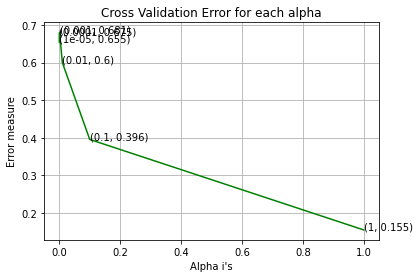

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For values of best alpha =  0.001 The train accuracy is: 0.7827490634422685
For values of best alpha =  0.001 The cross validation accuracy is: 0.6808381045194299
For values of best alpha =  0.001 The test accuracy is: 0.6762498781795147


In [79]:
alpha = [10 ** x for x in range(-5, 1)]
cv_accuracy_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='hinge', random_state=42)
    clf.fit(train_description_feature_onehotCoding, y_train)
    
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_description_feature_onehotCoding, y_train)
    predict_y = sig_clf.predict(cv_description_feature_onehotCoding)
    
    cv_accuracy_array.append(accuracy_score(y_cv, predict_y))
    print('For values of alpha = ', i, "The accuracy loss is:",accuracy_score(y_cv, predict_y))

fig, ax = plt.subplots()
ax.plot(alpha, cv_accuracy_array,c='g')
for i, txt in enumerate(np.round(cv_accuracy_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_accuracy_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmax(cv_accuracy_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(train_description_feature_onehotCoding, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_description_feature_onehotCoding, y_train)

predict_y = sig_clf.predict(train_description_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train accuracy is:",accuracy_score(y_train, predict_y))
predict_y = sig_clf.predict(cv_description_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation accuracy is:",accuracy_score(y_cv, predict_y))
predict_y = sig_clf.predict(test_description_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test accuracy is:",accuracy_score(y_test, predict_y))

In [84]:
# prediction
predict_y

array([17,  5, 14, ...,  7,  9,  3], dtype=int8)